# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Preparemos data de prueba (Creación de data)

* Creo data

In [2]:
X,y,c = make_blobs(n_samples=500, centers =4, n_features=2,
                 return_centers = True, cluster_std=0.8)

* Creación Dataframe data

In [3]:
df_blobs = pd.DataFrame({
    'x1': X[:,0],
    'x2': X[:,1],
    'y':y
})

* Creo data con centroides

In [4]:
df_centers = pd.DataFrame({
    'x1': c[:,0],
    'x2': c[:,1]
})

* Creo data con make_moons

In [6]:
X_m, y_m = make_moons(n_samples =250, noise= 0.05, random_state=42)

df_moons = pd.DataFrame({
    'x1': X_m[:,0],
    'x2': X_m[:,1]
})

# Visualización de datos

* Data normalita

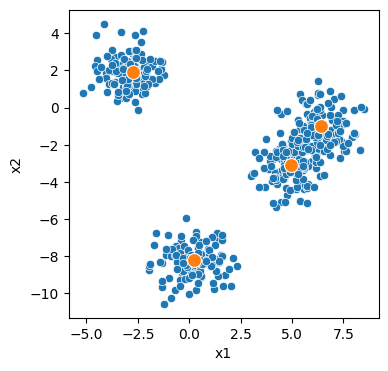

In [8]:
fig = plt.figure(figsize = (4,4))
sns.scatterplot(data=df_blobs, x='x1', y ='x2')
sns.scatterplot(data=df_centers, x='x1', y ='x2',
                markers='X', s=100)
plt.show()

* Data Lunas

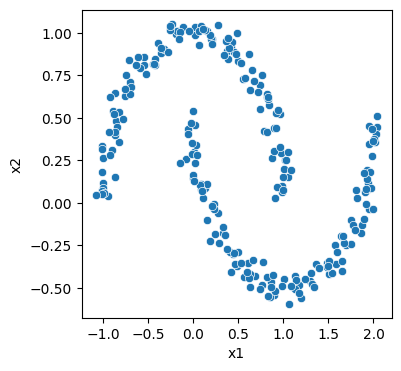

In [10]:
fig = plt.figure(figsize = (4,4))
sns.scatterplot(data=df_moons, x='x1', y = 'x2')
plt.show()

# Aplicación/Implementación DBCSAN

## Aplicación

* Creo modelo de clusterización

In [12]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)

* Predicción, y clusterización

In [14]:
y_m_predict = dbscan_cluster.fit_predict(X_m);
df_moons['cluster'] = y_m_predict

## Grafico la clusterización alcanzada/predicciones

* Visualización

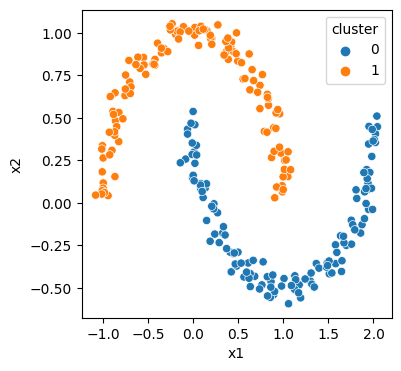

In [15]:
fig = plt.figure(figsize = (4,4))
sns.scatterplot(data=df_moons, x='x1', y = 'x2',hue='cluster')
plt.show()

## Aplico DBSCAN en el otro dataset

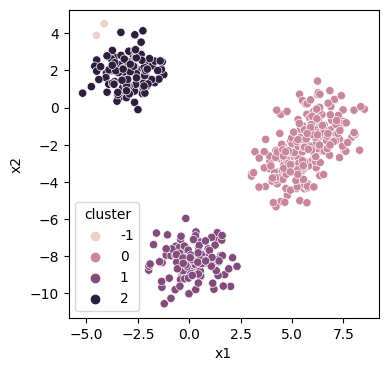

In [29]:
dbscan = DBSCAN(eps=1, min_samples=4)

y_predict = dbscan.fit_predict(X);
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize = (4,4))
sns.scatterplot(data=df_blobs, x='x1', y = 'x2',hue='cluster')
plt.plot()
plt.show()

# Hiperparameters

## Miremos los vecinos con distancias más cercanos, técnica de la rodilla

* Imports

In [32]:
from sklearn.neighbors import NearestNeighbors

* Encuentro vecinos cércanos

In [33]:
# n_neighbors, # de vecinos
neighbors = NearestNeighbors(n_neighbors=3)


#Hacemos fit sobre la data
neighbors_fit = neighbors.fit(X)

distances, indices = neighbors_fit.kneighbors(X)

* Tragio distancias del punto más cercano

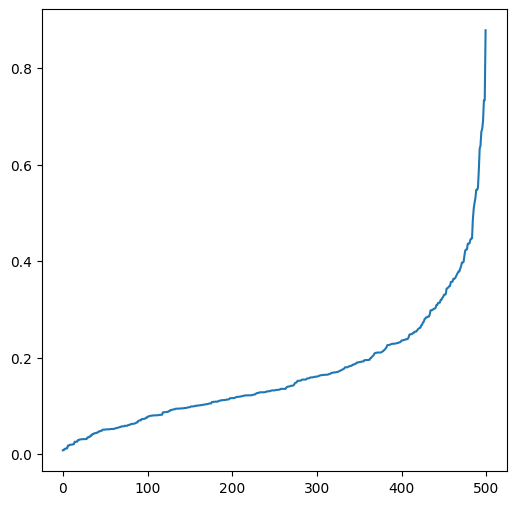

In [35]:
# Organizo las distancias con respecto a la más cercana por punto
distances = np.sort(distances, axis=0)

# traigo el más cercano"
distances = distances[:, 1]

fig = plt.figure(figsize=(6,6))
plt. plot(distances)#grafico distances

## Encontremos el Epsilon y min-samples

* Defino epsilons y min_samples a evaluar

In [38]:
# rango de evaluación
eps_values = np.arange (0.25, 0.8, 0.1)

#evaluamos también por el mínimo de muestras 
min_samples = np.arange(2,10)


* Imports para convertir elemenos en matriz

In [39]:
from itertools import product

* Matriz eps,min, y defino coeficiente de silueta en lista

In [45]:
dbscan_params = list(product(eps_values, min_samples))
print(dbscan_params[0:2])

sil_score = []

[(0.25, 2), (0.25, 3)]


* Itración

In [48]:
for p in dbscan_params:
  y_pred = DBSCAN(eps = p[0], min_samples=p[1]).fit_predict(X)
  sil_score.append(silhouette_score(X,y_pred))

* Grafiquemos índicecs de silueta

In [55]:
#Creamos df con data
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns =[
    'eps', 'min_samples'])
df_params_tunning['sil_score'] = sil_score
print(df_params_tunning.head(2))

#volvermos DF en estructura matricial
pivot_data = pd.pivot_table(df_params_tunning, values='sil_score', 
               index='min_samples', columns = 'eps')

pivot_data

    eps  min_samples  sil_score
0  0.25            2  -0.020985
1  0.25            3  -0.069328


eps,0.25,0.35,0.45,0.55,0.65,0.75
min_samples,,,,,,
2,-0.020985,-0.141544,-0.029346,0.203001,0.263982,0.546309
3,-0.069328,-0.044422,0.200858,0.248417,0.352666,0.730937
4,-0.161399,-0.112212,0.307998,0.485487,0.701256,0.720939
5,-0.165629,0.182617,0.320282,0.642022,0.684787,0.719115
6,-0.310327,0.132169,0.527725,0.606446,0.677238,0.719330
7,-0.400906,0.044230,0.330505,0.398748,0.654827,0.719330
8,-0.508638,-0.050005,0.460133,0.555619,0.646524,0.707082
9,-0.596257,-0.085187,0.438815,0.537988,0.639347,0.696826


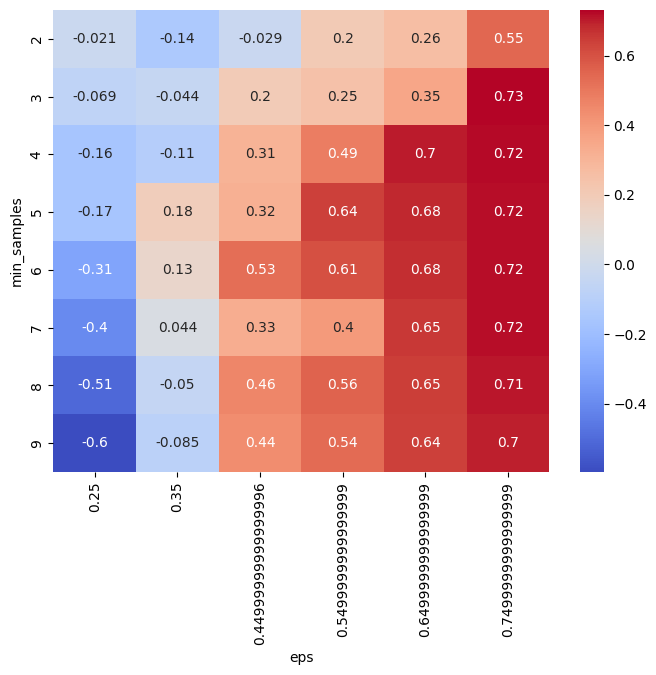

In [57]:
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size': 10}, 
            cmap='coolwarm', ax = ax)
plt.show()

# Evaluación

* Creo modelo y entreno

In [62]:
dbscan_cluster = DBSCAN(eps=0.7499999, min_samples= 3)

y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict

* Grafico esta clusterización

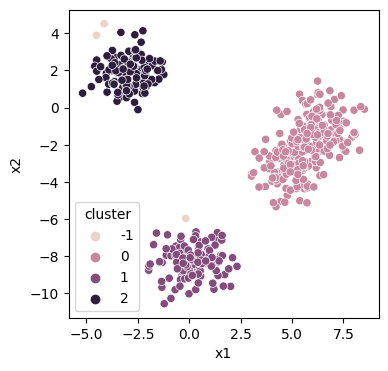

In [63]:
fig = plt.figure(figsize = (4,4))
sns.scatterplot(data=df_blobs, x='x1', y = 'x2',hue='cluster')
plt.plot()
plt.show()

* Graficamos coef. de silueta

For n_clusters = 4 The average silhouette_score is : 0.7309367826094296


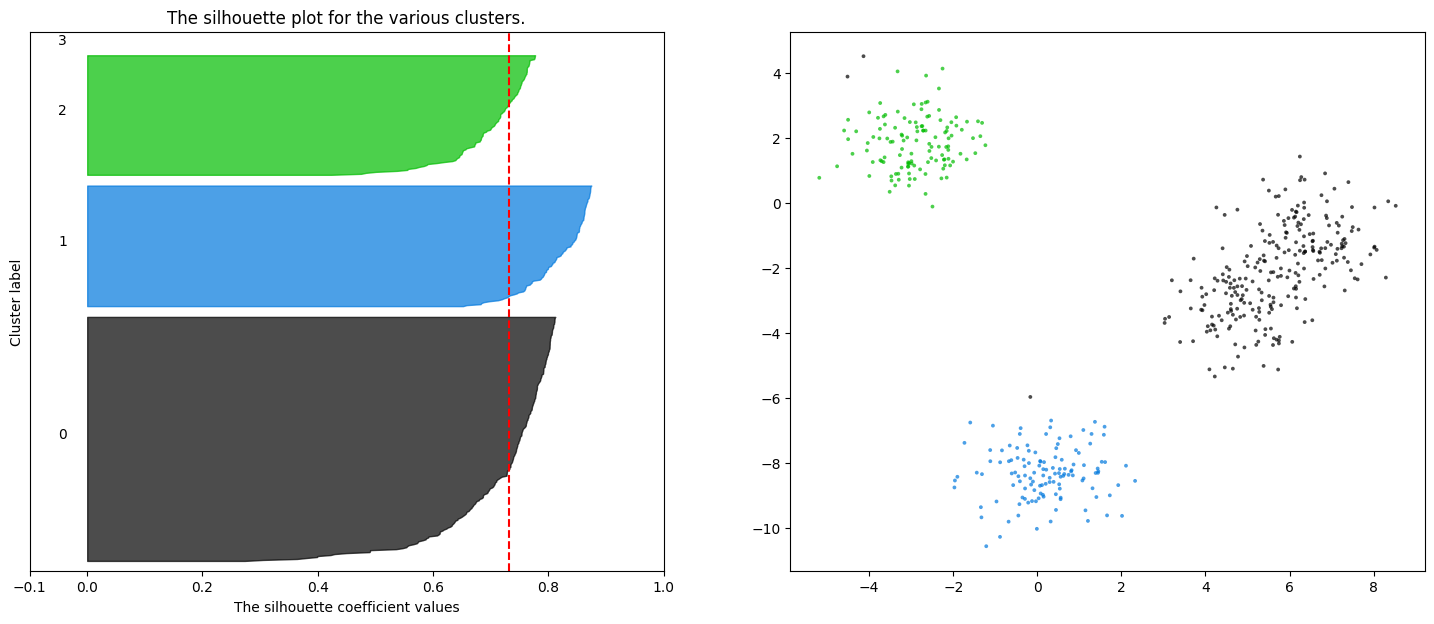

In [64]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

clusterer = DBSCAN(eps=0.7499999, min_samples= 3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
  "For n_clusters =",
  n_clusters,
  "The average silhouette_score is :",
  silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
  # Aggregate the silhouette scores for samples belonging to
  # cluster i, and sort them
  ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(
    np.arange(y_lower, y_upper),
    0,
    ith_cluster_silhouette_values,
    facecolor=color,
    edgecolor=color,
    alpha=0.7,
  )

  # Label the silhouette plots with their cluster numbers at the middle
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  # Compute the new y_lower for next plot
  y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
  X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

plt.show()